## Analiza rabljenih avtomobilov

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

avti = pd.read_csv("../podatki/rabljeni_avtomobili.csv", index_col=0)
avti.sample(frac=0.001).head(5)

,ime_znamke,ime_modela,ime_razlicice,tip_modela,menjalnik,vrsta_motorja,stevilo_vrat,stevilo_prestav,konjske_moci,kilovati,prostornina_motorja,povezava,naslov_oglasa,leto_izdelave,stevilo_kilometrov,cena,platforma,id_razlicice,id_modela
1232,Audi,A4 Avant,A4 Avant,KARAVAN,ROČNI,DIEZEL,NaN,6.0,170.0,125.0,1.968,https://www.avto.net/Ads/details.asp?id=176878...,Audi A4 Avant avant 2.0 TDI 125 kW Business,2010.0,278634.0,10550.0,avtonet,964.0,145.0
6929,Ford,Focus,NaN,NaN,ROČNI,DIEZEL,NaN,NaN,116.0,85.0,1.560,https://www.avto.net/Ads/details.asp?id=177428...,Ford Focus Titanium 1.6 TDCi 2.LASTNIK|SLO|TEM...,2013.0,135760.0,8450.0,avtonet,NaN,NaN
2342,Audi,A6 Avant,A6 Avant (C8),KARAVAN,AVTOMATSKI,DIEZEL,NaN,7.0,204.0,150.0,1.968,https://www.avto.net/Ads/details.asp?id=176222...,Audi A6 Avant 40TDI Q S-tronic 3xS-LINE-MATRIX...,2019.0,129025.0,42899.0,avtonet,1531.0,164.0
8533,Jeep,Grand Cherokee,Grand Cherokee,SUV,AVTOMATSKI,DIEZEL,NaN,8.0,250.0,184.0,2.987,https://www.avto.net/Ads/details.asp?id=167870...,Jeep Grand Cherokee 3.0 CRD Overland Avt ACC z...,2017.0,149000.0,33990.0,avtonet,12694.0,1299.0
12098,Nissan,Qashqai,Qashqai,SUV,ROČNI,BENCIN,NaN,6.0,117.0,86.0,1.598,https://www.avto.net/Ads/details.asp?id=177757...,Nissan Qashqai 1.6 16V l 1.LASTNIK l SLO l SAM...,2013.0,125000.0,9490.0,avtonet,18237.0,1832.0


In [2]:
avti["starost"] = 2022 - avti.leto_izdelave

## Normiranje cene

ceno avtomobila bom normiral s povprečno ceno avtomobila istega modela, ki je bil izdelan letos.

In [3]:
nazivne_cene_modelov = avti[(avti.leto_izdelave == 2022) & (avti.stevilo_kilometrov < 5e3)].groupby(["ime_znamke", "ime_modela"]).cena.mean().rename("nazivna_cena")
avti_z_nc = pd.merge(avti, nazivne_cene_modelov, on=["ime_znamke", "ime_modela"])
avti_z_nc["normirana_cena"] = avti_z_nc.cena / avti_z_nc.nazivna_cena

#### Upad cene s starostjo
temneje -> več kilometrov

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

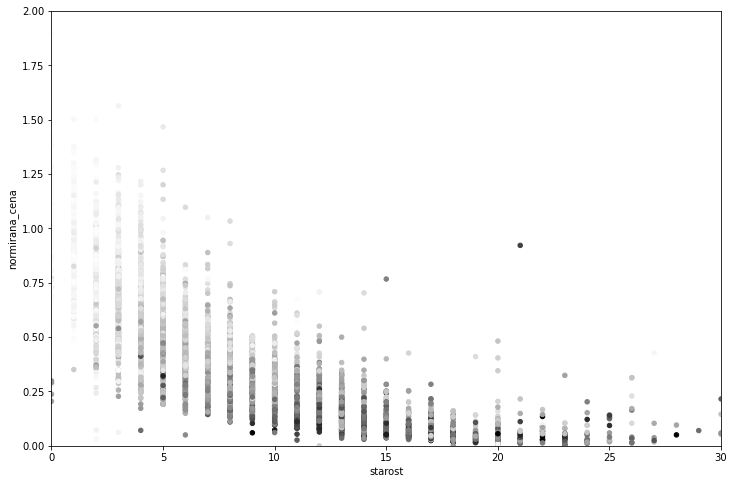

In [4]:
avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=avti_z_nc.stevilo_kilometrov.clip(0, 0.4e6),
    figsize=(12,8)
)

temneje -> močnejši motor

<AxesSubplot:xlabel='starost', ylabel='normirana_cena'>

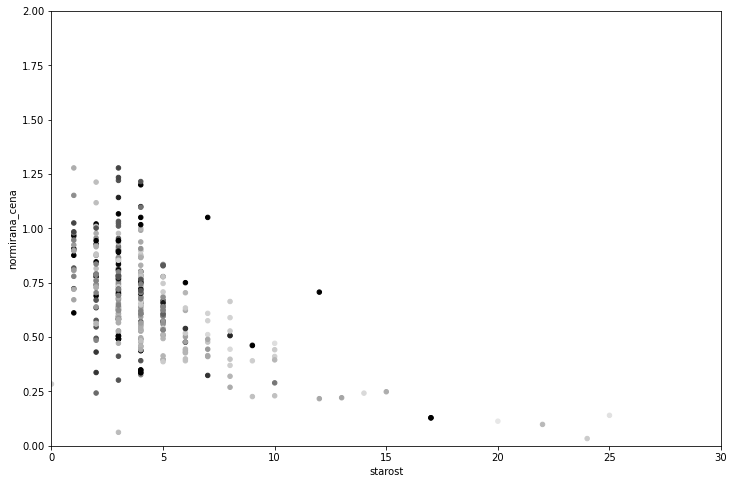

In [51]:
st_kilom = 0.5e5 # 120 000 km
fiks_avti_z_nc = avti_z_nc[
    avti_z_nc.stevilo_kilometrov.between(0.8*st_kilom, 1.2*st_kilom)
]
fiks_avti_z_nc.plot.scatter(
    "starost", "normirana_cena",
    xlim=(0,30), ylim=(0,2),
    c=fiks_avti_z_nc.konjske_moci.clip(0, 250),
    figsize=(12,8)
)

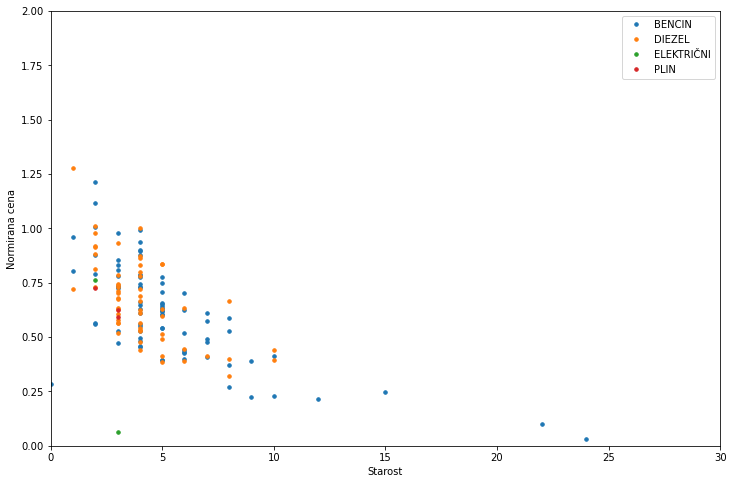

In [55]:
fig, ax = plt.subplots(figsize=(12,8))

fiks_moc_avti_z_nc = fiks_avti_z_nc[fiks_avti_z_nc.konjske_moci.between(80, 120)]

for ime, skupina in fiks_moc_avti_z_nc.groupby("vrsta_motorja"):
    ax.plot(
        skupina.starost,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

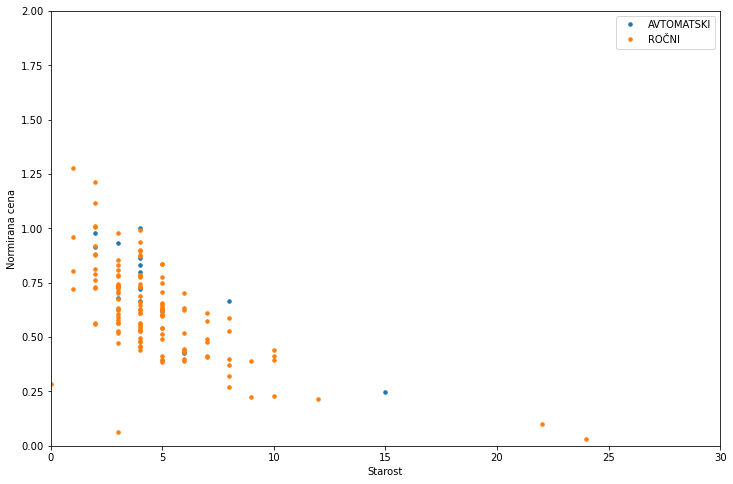

In [56]:
fig, ax = plt.subplots(figsize=(12,8))

for ime, skupina in fiks_moc_avti_z_nc.groupby("menjalnik"):
    ax.plot(
        skupina.starost,
        skupina.normirana_cena,
        marker='.',
        linestyle='',
        ms=7,
        label=ime,
    )
ax.set_xlabel("Starost")
ax.set_ylabel("Normirana cena")
ax.set_xlim(0,30)
ax.set_ylim(0,2)
ax.legend(numpoints=1, loc='upper right')

### Število prestav skozi leta

<AxesSubplot:xlabel='leto_izdelave'>

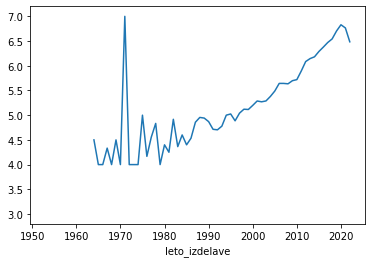

In [125]:
avti.groupby("leto_izdelave").stevilo_prestav.mean().plot()

### Najpogostejši modeli in različice posameznega modela
*Opomba*: oznaka **različica** predstavlja določeno izvedbo modela avtomobila (npr. z določenim motorjem in menjalnikom).

In [126]:
razlicice = avti.groupby(["ime_znamke", "ime_razlicice", "id_razlicice"])
naj_razlicice = razlicice.size().sort_values(ascending=False)
naj_modeli = avti.groupby("id_modela").size().sort_values(ascending=False)

naj_razlicice.head(6)

ime_znamke     ime_razlicice         id_razlicice
Mercedes-Benz  A-Class Sedan (V177)  16678.0         287
Volkswagen     Passat Variant        27296.0         272
Mercedes-Benz  CLA (C117)            16264.0         269
Volkswagen     Passat Variant        27295.0         206
               Tiguan                27026.0         192
               Passat Variant        27283.0         171
dtype: int64

### Povprečna cena glede na vrsto motorja

<AxesSubplot:xlabel='vrsta_motorja'>

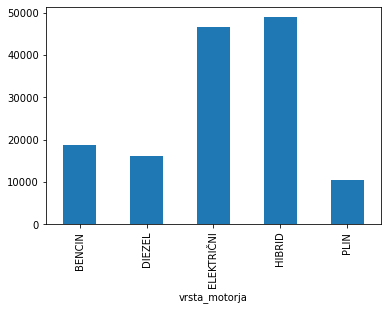

In [20]:
avti.groupby("vrsta_motorja").mean().cena.plot.bar()

<AxesSubplot:xlabel='leto_izdelave'>

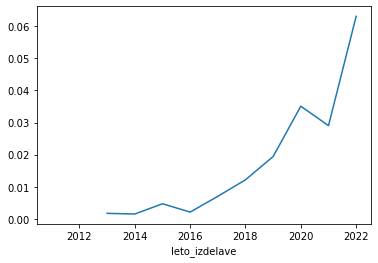

In [30]:
el_avti_po_letih = avti[avti.vrsta_motorja == "ELEKTRIČNI"].groupby("leto_izdelave").size()
avti_po_letih = avti.groupby("leto_izdelave").size()

(el_avti_po_letih / avti_po_letih).plot()